In [1]:
import numpy as np
import pickle
import multi_stages as stages
import matplotlib.pyplot as plt

In [2]:
import stages_gutzwiller_config as config

sim_list = config.sim_list


states_infty_list = [[], []]
pstates_infty_list = [[], []]
theta_guts_all = []
p_infty_gutz_all = []
for sim in sim_list:
    f = open(f"data/gutzwiller-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}-omega0={sim.omegaS}.pkl", "rb")
    data = pickle.load(f)
    f.close()

    f = open(f"data/mcsolve-Ns=2-lambda=(0.0, {sim.lmbd:.1f})-Nt=10000-T=10-dt=0.01.pkl", "rb")
    data_full = pickle.load(f)
    f.close()

    f = open(f"data/gutzwiller-analytical-lambda={sim.lmbd}.pkl", "rb")
    data_guts = pickle.load(f)
    f.close()

    theta_guts_all.append(data_guts[1])
    p_infty_gutz_all.append(data_guts[2])

    states_infty_list[0].append(data[1])
    states_infty_list[1].append(data_full[1])

    pstates_infty = [[], []]
    for state in data[1]:
        pstate = state.ptrace(0)
        pstates_infty[0].append(pstate)

    for state_full in data_full[1].states[:,-1]:
        pstate_full = state_full.ptrace(0)
        pstates_infty[1].append(pstate_full)

    pstates_infty_list[0].append(pstates_infty[0])
    pstates_infty_list[1].append(pstates_infty[1])


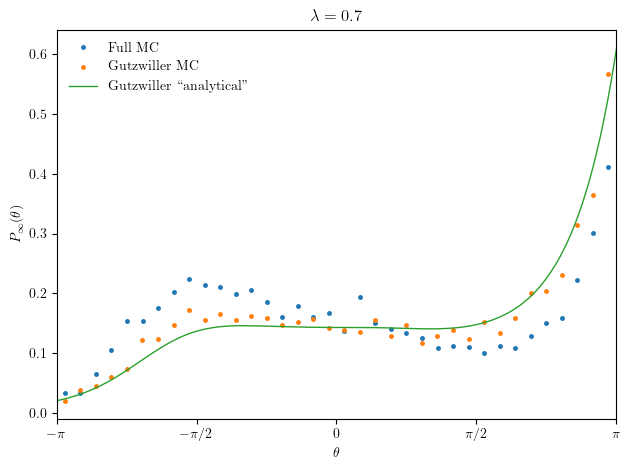

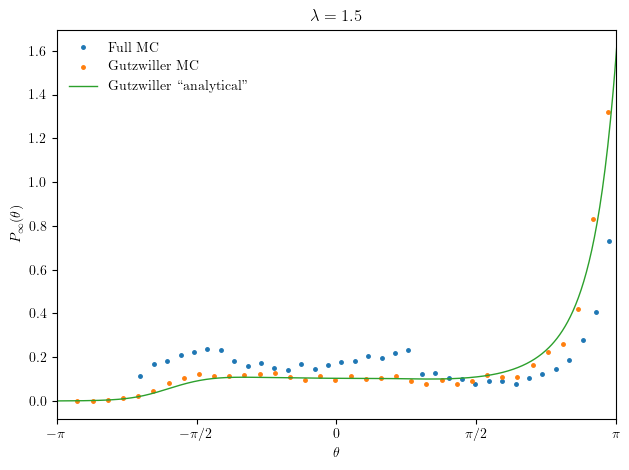

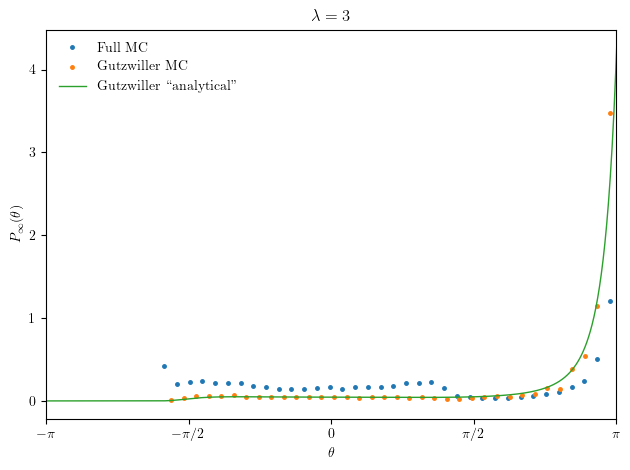

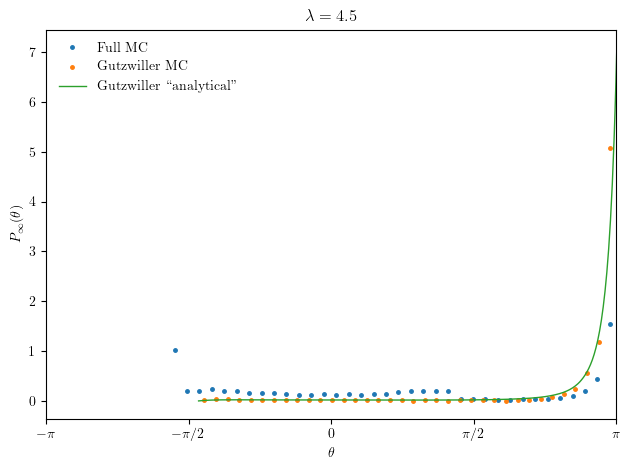

In [3]:
plt.style.use(["./config/stylelib/thesis.mplstyle"])

for i, sim in enumerate(sim_list):
    plt.figure()

    thetas = []
    for pstate in pstates_infty_list[0][i]:
        thetas.append(stages.state_to_theta(pstate))

    counts, bins = np.histogram(thetas, 36)
    bin_width = bins[1] - bins[0]
    freqs = counts / sim.Nt / bin_width

    thetas_full = []
    for pstate_full in pstates_infty_list[1][i]:
        thetas_full.append(stages.state_to_theta(pstate_full))

    counts_full, bins_full = np.histogram(thetas_full, 36)
    bin_width_full = bins_full[1] - bins_full[0]
    freqs_full = counts_full / np.sum(counts_full) / bin_width_full

    plt.plot(bins_full[:-1] + bin_width_full/2, freqs_full, ".", label=rf"Full MC")
    plt.plot(bins[:-1] + bin_width/2, freqs, ".", label=rf"Gutzwiller MC")
    plt.plot(theta_guts_all[i], p_infty_gutz_all[i], label="Gutzwiller ``analytical''")

    plt.xlim((-np.pi, np.pi))
    xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    xlabels = [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"]
    plt.xticks(xticks, xlabels)
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$P_\infty(\theta)$")
    plt.legend(loc="upper left")
    plt.title(rf"$\lambda = {sim.lmbd}$")

    plt.tight_layout()

    # plt.savefig(f"plots/Ns={sim.Ns}-lambda={sim.lmbd}-Nt={sim.Nt}T={sim.T}-dt={sim.dt}.pdf")